# Example pipeline execution

Here is an example of what it takes to configure and run a pipeline with flat-fielding and background subtraction.

## Setup CRDS

Make sure you have a local checkout of the CRDS cache as explained in the [Getting started page](getting-started.rst). Either run `source setup_local_crds.sh` to setup the enviroment variables in the shell or execute `setup_local_crds.py` for Python. This is needed to point the CRDS software to the CRDS cache. Optionally source this in your shell configuration to automatically set this up.

In [1]:
%run ../setup_local_crds.py

## Get input simulations
Download simulated input FITS files for the IRIS imager from [Figshare](https://figshare.com/articles/TMT_IRIS_test_simulations/9941939). It contains a raw science frame, a raw flat frame and a raw background frame.

In [2]:
import urllib.request
import zipfile
import os.path

if not os.path.exists("iris_example_data/raw_flat_frame_cal.fits"):
    urllib.request.urlretrieve(
        "https://ndownloader.figshare.com/articles/9941939/versions/1",
        "iris_example_data.zip"
    )

    with zipfile.ZipFile("iris_example_data.zip", 'r') as zip_ref:
        zip_ref.extractall("iris_example_data")

# this could take a few minutes

In [3]:
%ls iris_example_data/

raw_background_frame_cal.fits  raw_science_frame_sci.fits
raw_flat_frame_cal.fits


## Preprocess the flat frame
First we need to remove the dark frame from the flat frame and normalize it. A dark frame is already available in the CRDS and the pipeline knows how to retrieve it based on the metadata in the FITS file headers.

We can check in the package documentation what are the available pipelines and check the configuration options of the pipeline.ProcessFlatfieldL2 class.

We do not need to customize it so we can directly call it from tmtrun and pass the input FITS file:

This will pickup the relevant dark frame from the CRDS and process the file:

In [4]:
!tmtrun iris_pipeline.pipeline.ProcessFlatfieldL2 iris_example_data/raw_flat_frame_cal.fits

2020-10-09 17:22:27,553 - CRDS - ERROR -  Error determining best reference for 'pars-darkcurrentstep'  =   Unknown reference type 'pars-darkcurrentstep'
2020-10-09 17:22:27,562 - CRDS - ERROR -  Error determining best reference for 'pars-normalizestep'  =   Unknown reference type 'pars-normalizestep'
2020-10-09 17:22:27,570 - CRDS - ERROR -  Error determining best reference for 'pars-processflatfieldl2'  =   Unknown reference type 'pars-processflatfieldl2'
2020-10-09 17:22:27,571 - stpipe.ProcessFlatfieldL2 - INFO - ProcessFlatfieldL2 instance created.
2020-10-09 17:22:27,572 - stpipe.ProcessFlatfieldL2.dark_current - INFO - DarkCurrentStep instance created.
2020-10-09 17:22:27,573 - stpipe.ProcessFlatfieldL2.normalize - INFO - NormalizeStep instance created.
2020-10-09 17:22:27,573 - stpipe - INFO - Hostname: fv-az58
2020-10-09 17:22:27,573 - stpipe - INFO - OS: Linux


2020-10-09 17:22:27,608 - stpipe.ProcessFlatfieldL2 - INFO - Step ProcessFlatfieldL2 running with args ('iris_example_data/raw_flat_frame_cal.fits',).
2020-10-09 17:22:27,610 - stpipe.ProcessFlatfieldL2 - INFO - Step ProcessFlatfieldL2 parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'iris_example_data', 'steps': {'dark_current': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'iris_example_data', 'dark_output': None}, 'normalize': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

2020-10-09 17:22:27,799 - stpipe.ProcessFlatfieldL2 - INFO - Prefetching reference files for dataset: 'raw_flat_frame_cal.fits' reftypes = ['dark']
2020-10-09 17:22:27,806 - stpipe.ProcessFlatfieldL2 - INFO - Prefetch for DARK reference file is '/home/runner/crds_cache/references/tmt/iris/tmt_iris_dark_0001.fits'.
2020-10-09 17:22:27,807 - stpipe.ProcessFlatfieldL2 - INFO - Starting preprocess flatfield ...
2020-10-09 17:22:27,807 - stpipe.ProcessFlatfieldL2 - INFO - Processing product iris_example_data/raw_flat_frame
2020-10-09 17:22:27,807 - stpipe.ProcessFlatfieldL2 - INFO - Working on input iris_example_data/raw_flat_frame_cal.fits ...


2020-10-09 17:22:28,024 - stpipe.ProcessFlatfieldL2.dark_current - INFO - Step dark_current running with args (<IRISImageModel(4096, 4096) from raw_flat_frame_cal.fits>,).
2020-10-09 17:22:28,025 - stpipe.ProcessFlatfieldL2.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'iris_example_data', 'dark_output': None}
2020-10-09 17:22:28,044 - stpipe.ProcessFlatfieldL2.dark_current - INFO - Using DARK reference file /home/runner/crds_cache/references/tmt/iris/tmt_iris_dark_0001.fits


2020-10-09 17:22:28,627 - stpipe.ProcessFlatfieldL2.dark_current - INFO - Step dark_current done


2020-10-09 17:22:28,670 - stpipe.ProcessFlatfieldL2.normalize - INFO - Step normalize running with args (<IRISImageModel(4096, 4096) from raw_flat_frame_cal.fits>,).
2020-10-09 17:22:28,671 - stpipe.ProcessFlatfieldL2.normalize - INFO - Step normalize parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'iris_example_data', 'method': 'median'}


2020-10-09 17:22:29,166 - stpipe.ProcessFlatfieldL2.normalize - INFO - running normalize with method median


2020-10-09 17:22:29,201 - stpipe.ProcessFlatfieldL2.normalize - INFO - Step normalize done
2020-10-09 17:22:29,201 - stpipe.ProcessFlatfieldL2 - INFO - Finished processing product iris_example_data/raw_flat_frame
2020-10-09 17:22:29,201 - stpipe.ProcessFlatfieldL2 - INFO - ... ending preprocess flatfield


2020-10-09 17:22:30,292 - stpipe.ProcessFlatfieldL2 - INFO - Saved model in raw_flat_frame_flat.fits
2020-10-09 17:22:30,292 - stpipe.ProcessFlatfieldL2 - INFO - Step ProcessFlatfieldL2 done


## Configure the image processing pipeline

The [`ProcessImagerL2Pipeline`](api/iris_pipeline.pipeline.ProcessImagerL2Pipeline.rst#iris_pipeline.ProcessImagerL2Pipeline) can be configured using a INI-style configuration file:

In [5]:
%%file image2_iris.cfg


name = "ProcessImagerL2Pipeline"
class = "iris_pipeline.pipeline.ProcessImagerL2Pipeline"
save_results = True

    [steps]
      [[bkg_subtract]]
      [[assign_wcs]]
        skip = True
      [[flat_field]]
        config_file = flat_field.cfg
      [[photom]]
        skip = True
      [[resample]]
        skip = True

Writing image2_iris.cfg


first we specify that we want to execute the pipeline defined in the pipeline, then we can configure each of the steps, for example skip some of them. Also we can import the configuration of a step from another file, in this case flat_field.cfg:

In [6]:
%%file flat_field.cfg

name = "flat_field"
class = "jwst.flatfield.FlatFieldStep"
override_flat = 'raw_flat_frame_flat.fits'

Writing flat_field.cfg


## Define the input data

JWST created a specification for defining how input files should be used by a pipeline, it is a JSON file named an association, see the [JWST documentation](https://jwst-pipeline.readthedocs.io/en/latest/jwst/associations/overview.html).

In our example we need to specify a input raw science frame ad a background to be subtracted:

In [7]:
%%file association.json

{
    "asn_rule": "Asn_Lv2Image",
    "asn_pool": "pool",
    "asn_type": "image2",
    "products": [
        {
            "name": "test_iris_subtract_bg_flat",
            "members": [
                {
                    "expname": "iris_example_data/raw_science_frame_sci.fits",
                    "exptype": "science"
                },
                {
                    "expname": "iris_example_data/raw_background_frame_cal.fits",
                    "exptype": "background"
                }
            ]
        }
    ]
}

Writing association.json


## Execute the pipeline from the command line

Execute the pipeline from the command line
We can use tmtrun from a terminal to execute the pipeline:

In [8]:
!tmtrun image2_iris.cfg association.json

2020-10-09 17:22:33,876 - CRDS - ERROR -  Error determining best reference for 'pars-backgroundstep'  =   Unknown reference type 'pars-backgroundstep'


2020-10-09 17:22:34,224 - CRDS - ERROR -  Error determining best reference for 'pars-assignwcsstep'  =   Unknown reference type 'pars-assignwcsstep'


2020-10-09 17:22:34,499 - CRDS - ERROR -  Error determining best reference for 'pars-parsesubarraymapstep'  =   Unknown reference type 'pars-parsesubarraymapstep'


2020-10-09 17:22:34,832 - CRDS - ERROR -  Error determining best reference for 'pars-darkcurrentstep'  =   Unknown reference type 'pars-darkcurrentstep'


2020-10-09 17:22:35,145 - CRDS - ERROR -  Error determining best reference for 'pars-flatfieldstep'  =   Unknown reference type 'pars-flatfieldstep'


2020-10-09 17:22:35,479 - CRDS - ERROR -  Error determining best reference for 'pars-photomstep'  =   Unknown reference type 'pars-photomstep'


2020-10-09 17:22:35,766 - CRDS - ERROR -  Error determining best reference for 'pars-resamplestep'  =   Unknown reference type 'pars-resamplestep'


2020-10-09 17:22:36,133 - CRDS - ERROR -  Error determining best reference for 'pars-processimagerl2pipeline'  =   Unknown reference type 'pars-processimagerl2pipeline'
2020-10-09 17:22:36,141 - stpipe.ProcessImagerL2Pipeline - INFO - ProcessImagerL2Pipeline instance created.
2020-10-09 17:22:36,142 - stpipe.ProcessImagerL2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2020-10-09 17:22:36,143 - stpipe.ProcessImagerL2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2020-10-09 17:22:36,143 - stpipe.ProcessImagerL2Pipeline.parse_subarray_map - INFO - ParseSubarrayMapStep instance created.
2020-10-09 17:22:36,144 - stpipe.ProcessImagerL2Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2020-10-09 17:22:36,145 - stpipe.ProcessImagerL2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2020-10-09 17:22:36,158 - stpipe.ProcessImagerL2Pipeline.photom - INFO - PhotomStep instance created.
2020-10-09 17:22:36,159 - stpipe.ProcessImagerL2Pipeli

2020-10-09 17:22:36,217 - stpipe.ProcessImagerL2Pipeline - INFO - Step ProcessImagerL2Pipeline running with args ('association.json',).


2020-10-09 17:22:36,222 - stpipe.ProcessImagerL2Pipeline - INFO - Step ProcessImagerL2Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_bsub': False, 'steps': {'bkg_subtract': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'sigma': 3.0, 'maxiters': None}, 'assign_wcs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55},

2020-10-09 17:22:36,464 - stpipe.ProcessImagerL2Pipeline - INFO - Prefetching reference files for dataset: 'raw_science_frame_sci.fits' reftypes = ['dark']
2020-10-09 17:22:36,471 - stpipe.ProcessImagerL2Pipeline - INFO - Prefetch for DARK reference file is '/home/runner/crds_cache/references/tmt/iris/tmt_iris_dark_0001.fits'.
2020-10-09 17:22:36,471 - stpipe.ProcessImagerL2Pipeline - INFO - Override for FLAT reference file is '/tmp/tmpe4xwe12_/29e13c55bf78a0195dc238e160209fc89ba5a0da/docs/raw_flat_frame_flat.fits'.
2020-10-09 17:22:36,472 - stpipe.ProcessImagerL2Pipeline - INFO - Starting calwebb_image2 ...


2020-10-09 17:22:36,480 - stpipe.ProcessImagerL2Pipeline - INFO - Processing product test_iris_subtract_bg_flat
2020-10-09 17:22:36,480 - stpipe.ProcessImagerL2Pipeline - INFO - Working on input iris_example_data/raw_science_frame_sci.fits ...


2020-10-09 17:22:36,743 - stpipe.ProcessImagerL2Pipeline.bkg_subtract - INFO - Step bkg_subtract running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>, ['iris_example_data/raw_background_frame_cal.fits']).
2020-10-09 17:22:36,744 - stpipe.ProcessImagerL2Pipeline.bkg_subtract - INFO - Step bkg_subtract parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'bsub', 'search_output_file': True, 'input_dir': '', 'sigma': 3.0, 'maxiters': None}


2020-10-09 17:22:46,680 - stpipe.ProcessImagerL2Pipeline.bkg_subtract - INFO - Step bkg_subtract done


2020-10-09 17:22:46,724 - stpipe.ProcessImagerL2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>,).
2020-10-09 17:22:46,725 - stpipe.ProcessImagerL2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'slit_y_low': -0.55, 'slit_y_high': 0.55}
2020-10-09 17:22:46,725 - stpipe.ProcessImagerL2Pipeline.assign_wcs - INFO - Step skipped.
2020-10-09 17:22:46,725 - stpipe.ProcessImagerL2Pipeline.assign_wcs - INFO - Step assign_wcs done


2020-10-09 17:22:46,750 - stpipe.ProcessImagerL2Pipeline.parse_subarray_map - INFO - Step parse_subarray_map running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>,).
2020-10-09 17:22:46,751 - stpipe.ProcessImagerL2Pipeline.parse_subarray_map - INFO - Step parse_subarray_map parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-10-09 17:22:46,762 - stpipe.ProcessImagerL2Pipeline.parse_subarray_map - INFO - No SUBARR_MAP extension found
2020-10-09 17:22:46,762 - stpipe.ProcessImagerL2Pipeline.parse_subarray_map - INFO - Step parse_subarray_map done


2020-10-09 17:22:46,785 - stpipe.ProcessImagerL2Pipeline.dark_current - INFO - Step dark_current running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>,).
2020-10-09 17:22:46,786 - stpipe.ProcessImagerL2Pipeline.dark_current - INFO - Step dark_current parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'dark_output': None}
2020-10-09 17:22:46,805 - stpipe.ProcessImagerL2Pipeline.dark_current - INFO - Using DARK reference file /home/runner/crds_cache/references/tmt/iris/tmt_iris_dark_0001.fits


2020-10-09 17:22:47,174 - stpipe.ProcessImagerL2Pipeline.dark_current - INFO - Step dark_current done


2020-10-09 17:22:47,214 - stpipe.ProcessImagerL2Pipeline.flat_field - INFO - Step flat_field running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>,).
2020-10-09 17:22:47,215 - stpipe.ProcessImagerL2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2020-10-09 17:22:47,887 - stpipe.ProcessImagerL2Pipeline.flat_field - INFO - Step flat_field done


2020-10-09 17:22:47,926 - stpipe.ProcessImagerL2Pipeline.photom - INFO - Step photom running with args (<IRISImageModel(4096, 4096) from raw_science_frame_sci.fits>,).
2020-10-09 17:22:47,927 - stpipe.ProcessImagerL2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2020-10-09 17:22:47,927 - stpipe.ProcessImagerL2Pipeline.photom - INFO - Step skipped.
2020-10-09 17:22:47,927 - stpipe.ProcessImagerL2Pipeline.photom - INFO - Step photom done
2020-10-09 17:22:47,927 - stpipe.ProcessImagerL2Pipeline - INFO - Finished processing product test_iris_subtract_bg_flat
2020-10-09 17:22:47,928 - stpipe.ProcessImagerL2Pipeline - INFO - ... ending calwebb_image2


2020-10-09 17:22:48,257 - stpipe.ProcessImagerL2Pipeline - INFO - Saved model in test_iris_subtract_bg_flat_cal.fits
2020-10-09 17:22:48,257 - stpipe.ProcessImagerL2Pipeline - INFO - Step ProcessImagerL2Pipeline done


## Plot the reduced frame

Finally we can use `iris_pipeline` to load the data and plot them:

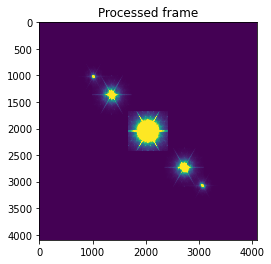

In [9]:
import iris_pipeline
reduced_science_frame = iris_pipeline.datamodels.IRISImageModel("test_iris_subtract_bg_flat_cal.fits")
try:    
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure()
    plt.imshow(reduced_science_frame.data, vmin=0, vmax=1500)
    plt.title("Processed frame")

except ImportError:
    pass

In [10]:
!rm image2_iris.cfg association.json flat_field.cfg